In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.cross_validation import KFold
from sklearn import grid_search

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
x = data.as_matrix()[:,0:data.shape[1]-1]
y = data.as_matrix()[:,data.shape[1]-1]

In [5]:
grid = {'n_estimators': np.arange(1,51)}
cv = KFold(len(x) , n_folds=5, shuffle=True, random_state=1)
clf = RandomForestRegressor(random_state=1)
gs = grid_search.GridSearchCV(clf, grid, scoring=make_scorer(r2_score),cv=cv)
gs.fit(x,y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=4177, n_folds=5),
       estimator=RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(r2_score), verbose=0)

In [6]:
i = 1
for a in gs.grid_scores_:
    if a.mean_validation_score > 0.52:
        break
    i += 1
print(i)

22


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

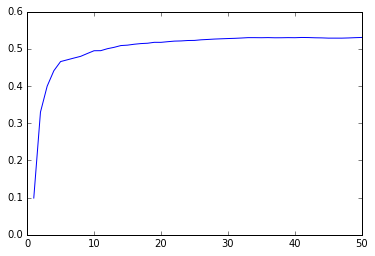

In [29]:
plt.plot(np.arange(1,51), [x.mean_validation_score for x in gs.grid_scores_])